## Load libraries 
(!version for websocket and signalk-client converted to python3)

In [1]:
import sys
import json
import logging
import requests
import threading
import time
import websocket # 0.48.0
import pkg_resources

from signalk_client.client import Client, Data

In [3]:
sk_client = Client(server='192.168.0.108:3000')
#sk_client = Client(server='demo.signalk.org')

ERROR:root:websocket error: Connection is already closed.


In [ ]:
sk_client.server

In [ ]:
sk_client.data.get_vessels()

## Get data for own vessel / available targets

In [ ]:
vessel = sk_client.data.get_self()
targets = vessel.get_targets()

print(vessel)
print(targets)
for target in targets:
    print("-------------------------------------------------------------")
    print("target : ", target)
    print("prop : ", vessel.get_prop(target))
    print("datum : ", vessel.get_datum(target))
    print("datum_value : ", vessel.get_datum(target).value)
    print("datum_display_value : ", vessel.get_datum(target).display_value())
    print("datum_path : ", vessel.get_datum(target).display_path())


Get usefull data for the pilot

In [ ]:
vessel = sk_client.data.get_self()
print("steering angle (rad): ", vessel.get_datum('steering.rudderAngle').value)
print("SOG (m/s) : ", vessel.get_datum('navigation.speedOverGround').value)
print("mag heading (rad) : ", vessel.get_datum('navigation.headingMagnetic').value)
print("mag var (rad) : ", vessel.get_datum('navigation.magneticVariation').value)

In [51]:
import datetime as dt
vessel = sk_client.data.get_self()
print(vessel.get_prop('navigation.headingMagnetic')['value'])
print(vessel.get_prop('navigation.headingMagnetic')['timestamp'])
time = dt.datetime.strptime(vessel.get_prop('navigation.headingMagnetic')['timestamp'], '%Y-%m-%dT%H:%M:%S.%fZ')
type(time)

2.5492
2019-04-09T02:40:32.175Z


datetime.datetime

In [89]:
vessel = sk_client.data.get_self()

import sched, time
import datetime as dt

s = sched.scheduler(time.time, time.sleep)
path = 'navigation.headingMagnetic'
# path = 'steering.rudderAngle'
# path = 'navigation.speedOverGround'
# path = 'environment.wind.angleApparent'
# path = 'environment.wind.speedApparent'
data = []
datadot = []
time = []
i = 0


def get_data_point(sc): 
    # do your stuff
    print(vessel.get_prop(path)['value'])
    print(vessel.get_prop(path)['timestamp'])
#     if vessel.get_prop('navigation.courseOverGroundTrue')['timestamp'] != time[i]:
    data.append(vessel.get_prop(path)['value'])
    #time.append(dt.datetime.strptime(vessel.get_prop(path)['timestamp'], '%Y-%m-%dT%H:%M:%S.%fZ'))
    dtime = dt.datetime.strptime(vessel.get_prop(path)['timestamp'], '%Y-%m-%dT%H:%M:%S.%fZ')
    time.append(dtime.timestamp())
    
    #datadot.append()
#         i += 1
#         print(i)
    s.enter(0.5, 1, get_data_point, (sc,))

s.enter(0.5, 1, get_data_point, (s,))
s.run()

ERROR:websocket:error from callback <bound method Client.__ws_on_message of <signalk_client.client.Client object at 0x000002FAEC7262E8>>: 'urn:mrn:imo:mmsi:512445000'


2.5754
2019-04-09T04:40:15.787Z
2.5754
2019-04-09T04:40:16.418Z
2.5841
2019-04-09T04:40:16.886Z
2.5841
2019-04-09T04:40:17.420Z
2.5841
2019-04-09T04:40:17.984Z
2.5841
2019-04-09T04:40:17.984Z
2.5841
2019-04-09T04:40:18.533Z
2.5841
2019-04-09T04:40:19.084Z
2.5841
2019-04-09T04:40:19.620Z
2.5841
2019-04-09T04:40:20.421Z
2.5841
2019-04-09T04:40:20.732Z
2.5841
2019-04-09T04:40:20.732Z
2.5929
2019-04-09T04:40:21.816Z
2.5929
2019-04-09T04:40:22.455Z
2.5929
2019-04-09T04:40:22.952Z
2.5929
2019-04-09T04:40:23.486Z
2.5929
2019-04-09T04:40:23.486Z
2.5929
2019-04-09T04:40:24.024Z
2.5929
2019-04-09T04:40:24.579Z
2.5929
2019-04-09T04:40:25.275Z
2.6016
2019-04-09T04:40:25.734Z
2.6016
2019-04-09T04:40:26.325Z
2.5929
2019-04-09T04:40:26.783Z
2.5929
2019-04-09T04:40:27.419Z
2.5929
2019-04-09T04:40:27.882Z
2.5929
2019-04-09T04:40:28.419Z
2.5929
2019-04-09T04:40:28.982Z
2.5929
2019-04-09T04:40:28.982Z
2.5929
2019-04-09T04:40:29.513Z
2.5929
2019-04-09T04:40:30.081Z
2.5929
2019-04-09T04:40:30.690Z


ERROR:websocket:error from callback <bound method Client.__ws_on_message of <signalk_client.client.Client object at 0x000002FAEC7262E8>>: 'urn:mrn:imo:mmsi:512445000'


2.5929
2019-04-09T04:40:31.376Z
2.5929
2019-04-09T04:40:31.712Z
2.5929
2019-04-09T04:40:32.384Z


ERROR:websocket:error from callback <bound method Client.__ws_on_message of <signalk_client.client.Client object at 0x000002FAEC7262E8>>: 'urn:mrn:imo:mmsi:512003252'


2.5841
2019-04-09T04:40:32.816Z
2.5841
2019-04-09T04:40:33.385Z
2.5841
2019-04-09T04:40:33.915Z


KeyboardInterrupt: 

ERROR:websocket:error from callback <bound method Client.__ws_on_message of <signalk_client.client.Client object at 0x000002FAEC7262E8>>: 'urn:mrn:imo:mmsi:512445000'
ERROR:websocket:error from callback <bound method Client.__ws_on_message of <signalk_client.client.Client object at 0x000002FAEC7262E8>>: 'urn:mrn:imo:mmsi:512263000'


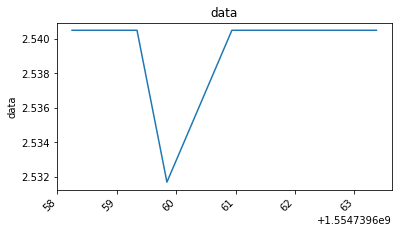

ERROR:websocket:error from callback <bound method Client.__ws_on_message of <signalk_client.client.Client object at 0x000002FAEC7262E8>>: 'urn:mrn:imo:mmsi:356747000'
ERROR:websocket:error from callback <bound method Client.__ws_on_message of <signalk_client.client.Client object at 0x000002FAEC7262E8>>: 'urn:mrn:imo:mmsi:356747000'
ERROR:websocket:error from callback <bound method Client.__ws_on_message of <signalk_client.client.Client object at 0x000002FAEC7262E8>>: 'urn:mrn:imo:mmsi:356747000'
ERROR:websocket:error from callback <bound method Client.__ws_on_message of <signalk_client.client.Client object at 0x000002FAEC7262E8>>: 'urn:mrn:imo:mmsi:356747000'
ERROR:websocket:error from callback <bound method Client.__ws_on_message of <signalk_client.client.Client object at 0x000002FAEC7262E8>>: 'urn:mrn:imo:mmsi:356747000'
ERROR:websocket:error from callback <bound method Client.__ws_on_message of <signalk_client.client.Client object at 0x000002FAEC7262E8>>: 'urn:mrn:imo:mmsi:356747000

In [74]:
import matplotlib.pyplot as plt

# Create figure for plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# Draw plot
ax.plot(time, data)

# Format plot
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.30)
plt.title('data')
plt.ylabel('data')

# Draw the graph
plt.show()

In [ ]:
print(time)
print(data[-1] - data[-4])
print(time[-1] - time[-4])

In [ ]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# define path
path = 'navigation.headingMagnetic'
# path = 'steering.rudderAngle'
# path = 'navigation.speedOverGround'
# path = 'environment.wind.angleApparent'
# path = 'environment.wind.speedApparent'

# Create figure for plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
time = []
data = []

# init vessel comm 
vessel = sk_client.data.get_self()

# This function is called periodically from FuncAnimation
def animate(i, time, data):

    # Add x and y to lists
    data.append(vessel.get_prop(path)['value'])
    time.append(vessel.get_prop(path)['timestamp'])

    # Limit x and y lists to 20 items
    time = time[-20:]
    data = data[-20:]

    # Draw x and y lists
    ax.clear()
    ax.plot(time, data)

    # Format plot
    plt.xticks(rotation=45, ha='right')
    plt.subplots_adjust(bottom=0.30)
    plt.title('data over Time')
    plt.ylabel('data')

# Set up plot to call animate() function periodically
ani = animation.FuncAnimation(fig, animate, fargs=(time, data), interval=1000)
plt.show()


In [4]:
sk_client.close()